## Medical Cost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN

In [2]:
data = pd.read_csv('./Medical_Cost.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
le=LabelEncoder()

In [10]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [11]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Splitting the data into train and test

In [12]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Scaling

In [13]:
sc = StandardScaler()

In [14]:
x = sc.fit_transform(x)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

### Setting random seed for reproducibility

In [16]:
tf.random.set_seed(42)

### Define the model architecture

In [17]:
model = Sequential()

### Adding neuron and layers

In [18]:
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

### Compiling the model

In [19]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

### Define early stopping criteria

In [20]:
early_stopping = EarlyStopping(monitor='val_loss',patience=30,verbose=1)

### Training the model with early stopping

In [21]:
history = model.fit(x_train,y_train,batch_size=50,callbacks=[early_stopping],epochs=5000,validation_data = (x_test,y_test))

Epoch 1/5000
22/22 [==============================] - 1s 10ms/step - loss: 306645728.0000 - val_loss: 387298688.0000
Epoch 2/5000
22/22 [==============================] - 0s 3ms/step - loss: 306468448.0000 - val_loss: 386990464.0000
Epoch 3/5000
22/22 [==============================] - 0s 3ms/step - loss: 306095968.0000 - val_loss: 386363840.0000
Epoch 4/5000
22/22 [==============================] - 0s 4ms/step - loss: 305371552.0000 - val_loss: 385187904.0000
Epoch 5/5000
22/22 [==============================] - 0s 3ms/step - loss: 304066208.0000 - val_loss: 383199712.0000
Epoch 6/5000
22/22 [==============================] - 0s 3ms/step - loss: 302020704.0000 - val_loss: 380146336.0000
Epoch 7/5000
22/22 [==============================] - 0s 3ms/step - loss: 298903008.0000 - val_loss: 375758592.0000
Epoch 8/5000
22/22 [==============================] - 0s 3ms/step - loss: 294678688.0000 - val_loss: 369519808.0000
Epoch 9/5000
22/22 [==============================] - 0s 3ms/step - los

Epoch 72/5000
22/22 [==============================] - 0s 3ms/step - loss: 35177836.0000 - val_loss: 31687488.0000
Epoch 73/5000
22/22 [==============================] - 0s 3ms/step - loss: 35597740.0000 - val_loss: 31565632.0000
Epoch 74/5000
22/22 [==============================] - 0s 3ms/step - loss: 36199360.0000 - val_loss: 31476942.0000
Epoch 75/5000
22/22 [==============================] - 0s 3ms/step - loss: 35978368.0000 - val_loss: 31602626.0000
Epoch 76/5000
22/22 [==============================] - 0s 3ms/step - loss: 36265556.0000 - val_loss: 31731286.0000
Epoch 77/5000
22/22 [==============================] - 0s 3ms/step - loss: 35331880.0000 - val_loss: 31418174.0000
Epoch 78/5000
22/22 [==============================] - 0s 3ms/step - loss: 33926260.0000 - val_loss: 31393386.0000
Epoch 79/5000
22/22 [==============================] - 0s 3ms/step - loss: 34905848.0000 - val_loss: 31539802.0000
Epoch 80/5000
22/22 [==============================] - 0s 3ms/step - loss: 35377

Epoch 143/5000
22/22 [==============================] - 0s 3ms/step - loss: 33976808.0000 - val_loss: 29399900.0000
Epoch 144/5000
22/22 [==============================] - 0s 4ms/step - loss: 33538538.0000 - val_loss: 29175196.0000
Epoch 145/5000
22/22 [==============================] - 0s 4ms/step - loss: 32136366.0000 - val_loss: 29437824.0000
Epoch 146/5000
22/22 [==============================] - 0s 4ms/step - loss: 32187380.0000 - val_loss: 29387032.0000
Epoch 147/5000
22/22 [==============================] - 0s 3ms/step - loss: 33249210.0000 - val_loss: 28968098.0000
Epoch 148/5000
22/22 [==============================] - 0s 3ms/step - loss: 33885072.0000 - val_loss: 29237586.0000
Epoch 149/5000
22/22 [==============================] - 0s 3ms/step - loss: 32664810.0000 - val_loss: 29319726.0000
Epoch 150/5000
22/22 [==============================] - 0s 4ms/step - loss: 32750084.0000 - val_loss: 29277020.0000
Epoch 151/5000
22/22 [==============================] - 0s 4ms/step - lo

22/22 [==============================] - 0s 3ms/step - loss: 30189792.0000 - val_loss: 26129946.0000
Epoch 214/5000
22/22 [==============================] - 0s 4ms/step - loss: 29903132.0000 - val_loss: 25946622.0000
Epoch 215/5000
22/22 [==============================] - 0s 4ms/step - loss: 29692626.0000 - val_loss: 25929598.0000
Epoch 216/5000
22/22 [==============================] - 0s 3ms/step - loss: 29905696.0000 - val_loss: 26127404.0000
Epoch 217/5000
22/22 [==============================] - 0s 3ms/step - loss: 29221040.0000 - val_loss: 26031600.0000
Epoch 218/5000
22/22 [==============================] - 0s 3ms/step - loss: 29404100.0000 - val_loss: 25760542.0000
Epoch 219/5000
22/22 [==============================] - 0s 3ms/step - loss: 30086710.0000 - val_loss: 25792374.0000
Epoch 220/5000
22/22 [==============================] - 0s 3ms/step - loss: 30213754.0000 - val_loss: 25533708.0000
Epoch 221/5000
22/22 [==============================] - 0s 3ms/step - loss: 29920016.00

Epoch 284/5000
22/22 [==============================] - 0s 3ms/step - loss: 28027936.0000 - val_loss: 22934298.0000
Epoch 285/5000
22/22 [==============================] - 0s 3ms/step - loss: 27476320.0000 - val_loss: 23001278.0000
Epoch 286/5000
22/22 [==============================] - 0s 3ms/step - loss: 27172922.0000 - val_loss: 23129234.0000
Epoch 287/5000
22/22 [==============================] - 0s 3ms/step - loss: 26867044.0000 - val_loss: 23029838.0000
Epoch 288/5000
22/22 [==============================] - 0s 3ms/step - loss: 27739566.0000 - val_loss: 23097902.0000
Epoch 289/5000
22/22 [==============================] - 0s 3ms/step - loss: 27480560.0000 - val_loss: 23064078.0000
Epoch 290/5000
22/22 [==============================] - 0s 3ms/step - loss: 27600136.0000 - val_loss: 23075016.0000
Epoch 291/5000
22/22 [==============================] - 0s 3ms/step - loss: 26701222.0000 - val_loss: 23063024.0000
Epoch 292/5000
22/22 [==============================] - 0s 3ms/step - lo

22/22 [==============================] - 0s 3ms/step - loss: 25939368.0000 - val_loss: 21565452.0000
Epoch 355/5000
22/22 [==============================] - 0s 3ms/step - loss: 25920978.0000 - val_loss: 21522454.0000
Epoch 356/5000
22/22 [==============================] - 0s 3ms/step - loss: 26177456.0000 - val_loss: 21392618.0000
Epoch 357/5000
22/22 [==============================] - 0s 3ms/step - loss: 25224976.0000 - val_loss: 21397602.0000
Epoch 358/5000
22/22 [==============================] - 0s 3ms/step - loss: 26791884.0000 - val_loss: 21343668.0000
Epoch 359/5000
22/22 [==============================] - 0s 3ms/step - loss: 25756308.0000 - val_loss: 21430004.0000
Epoch 360/5000
22/22 [==============================] - 0s 3ms/step - loss: 25875246.0000 - val_loss: 21383638.0000
Epoch 361/5000
22/22 [==============================] - 0s 3ms/step - loss: 25997016.0000 - val_loss: 21278246.0000
Epoch 362/5000
22/22 [==============================] - 0s 3ms/step - loss: 25724014.00

Epoch 425/5000
22/22 [==============================] - 0s 3ms/step - loss: 24470696.0000 - val_loss: 19729394.0000
Epoch 426/5000
22/22 [==============================] - 0s 3ms/step - loss: 24812854.0000 - val_loss: 19786726.0000
Epoch 427/5000
22/22 [==============================] - 0s 3ms/step - loss: 25088510.0000 - val_loss: 19838870.0000
Epoch 428/5000
22/22 [==============================] - 0s 3ms/step - loss: 24391244.0000 - val_loss: 19740238.0000
Epoch 429/5000
22/22 [==============================] - 0s 3ms/step - loss: 25157764.0000 - val_loss: 19712448.0000
Epoch 430/5000
22/22 [==============================] - 0s 3ms/step - loss: 24395886.0000 - val_loss: 19687810.0000
Epoch 431/5000
22/22 [==============================] - 0s 3ms/step - loss: 24652014.0000 - val_loss: 19731040.0000
Epoch 432/5000
22/22 [==============================] - 0s 3ms/step - loss: 24859186.0000 - val_loss: 19839484.0000
Epoch 433/5000
22/22 [==============================] - 0s 3ms/step - lo

22/22 [==============================] - 0s 3ms/step - loss: 23308960.0000 - val_loss: 18881922.0000
Epoch 496/5000
22/22 [==============================] - 0s 3ms/step - loss: 22797542.0000 - val_loss: 18912850.0000
Epoch 497/5000
22/22 [==============================] - 0s 3ms/step - loss: 23150890.0000 - val_loss: 18978624.0000
Epoch 498/5000
22/22 [==============================] - 0s 3ms/step - loss: 23990814.0000 - val_loss: 18952938.0000
Epoch 499/5000
22/22 [==============================] - 0s 3ms/step - loss: 24062366.0000 - val_loss: 18880004.0000
Epoch 500/5000
22/22 [==============================] - 0s 3ms/step - loss: 23586792.0000 - val_loss: 18839096.0000
Epoch 501/5000
22/22 [==============================] - 0s 3ms/step - loss: 23591670.0000 - val_loss: 18763346.0000
Epoch 502/5000
22/22 [==============================] - 0s 3ms/step - loss: 23977746.0000 - val_loss: 18752202.0000
Epoch 503/5000
22/22 [==============================] - 0s 3ms/step - loss: 22859176.00

Epoch 566/5000
22/22 [==============================] - 0s 3ms/step - loss: 23507778.0000 - val_loss: 18638656.0000
Epoch 567/5000
22/22 [==============================] - 0s 3ms/step - loss: 23512626.0000 - val_loss: 18629348.0000
Epoch 568/5000
22/22 [==============================] - 0s 3ms/step - loss: 23187718.0000 - val_loss: 18551292.0000
Epoch 569/5000
22/22 [==============================] - 0s 3ms/step - loss: 23265470.0000 - val_loss: 18723430.0000
Epoch 570/5000
22/22 [==============================] - 0s 3ms/step - loss: 23230560.0000 - val_loss: 18666308.0000
Epoch 571/5000
22/22 [==============================] - 0s 3ms/step - loss: 23086554.0000 - val_loss: 18653746.0000
Epoch 572/5000
22/22 [==============================] - 0s 3ms/step - loss: 23895040.0000 - val_loss: 18528506.0000
Epoch 573/5000
22/22 [==============================] - 0s 3ms/step - loss: 23555330.0000 - val_loss: 18539350.0000
Epoch 574/5000
22/22 [==============================] - 0s 3ms/step - lo

22/22 [==============================] - 0s 3ms/step - loss: 23364882.0000 - val_loss: 18413370.0000
Epoch 637/5000
22/22 [==============================] - 0s 3ms/step - loss: 23127590.0000 - val_loss: 18433046.0000
Epoch 638/5000
22/22 [==============================] - 0s 3ms/step - loss: 23258424.0000 - val_loss: 18406004.0000
Epoch 639/5000
22/22 [==============================] - 0s 3ms/step - loss: 23567874.0000 - val_loss: 18436444.0000
Epoch 640/5000
22/22 [==============================] - 0s 3ms/step - loss: 23703280.0000 - val_loss: 18436924.0000
Epoch 641/5000
22/22 [==============================] - 0s 3ms/step - loss: 23075496.0000 - val_loss: 18411410.0000
Epoch 642/5000
22/22 [==============================] - 0s 3ms/step - loss: 23121780.0000 - val_loss: 18426304.0000
Epoch 643/5000
22/22 [==============================] - 0s 3ms/step - loss: 23158490.0000 - val_loss: 18444024.0000
Epoch 644/5000
22/22 [==============================] - 0s 3ms/step - loss: 22978566.00

### Evaluating the model

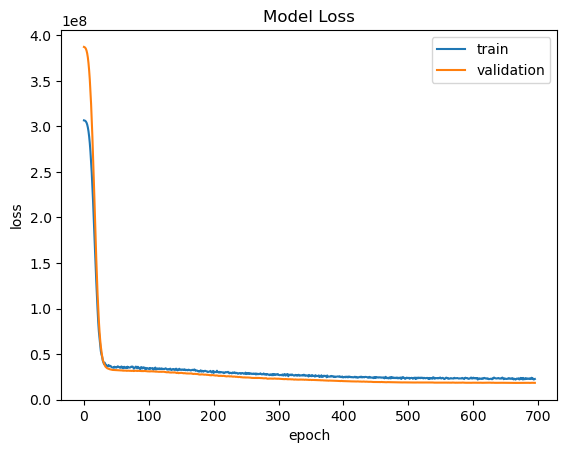

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc = 'upper right')
plt.show()

In [23]:
PREDICTION  = model.predict([x])

42/42 [==============================] - 0s 901us/step


In [24]:
OUTPUT = pd.DataFrame(zip(y,PREDICTION), columns= ['ACTUAL','PREDICTION'],dtype=float)
OUTPUT.PREDICTION = OUTPUT.PREDICTION.astype(float)
OUTPUT

,ACTUAL,PREDICTION
0,16884.92400,20695.396484
1,1725.55230,4529.402832
2,4449.46200,6038.601562
3,21984.47061,4913.485840
4,3866.85520,3899.929199
...,...,...
1332,10600.54830,11337.981445
1333,2205.98080,5221.707031
1334,1629.83350,2708.654053
1335,2007.94500,3705.168213


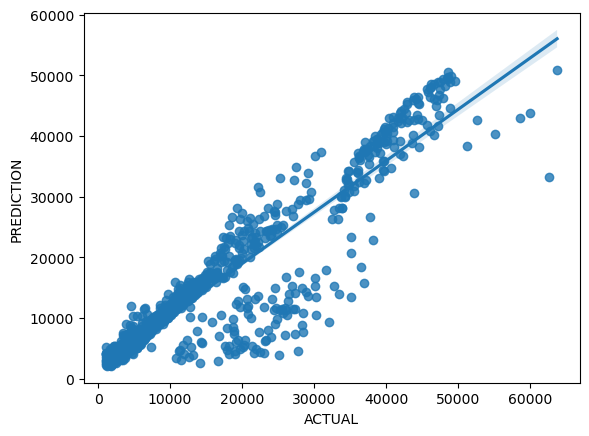

In [25]:
sns.regplot(data = OUTPUT, x = 'ACTUAL',y = 'PREDICTION')
plt.show()